In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [11]:
import requests

# Import the API key.
from config import weather_api_key

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1382488e5023aacb1eb34e928c7b95d7


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [16]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | el alto
Processing Record 2 of Set 13 | benguela
Processing Record 3 of Set 13 | magadan
Processing Record 4 of Set 13 | sola
Processing Record 5 of Set 13 | kapaa
Processing Record 6 of Set 13 | kloulklubed
Processing Record 7 of Set 13 | cap malheureux
Processing Record 8 of Set 13 | hithadhoo
Processing Record 9 of Set 13 | albany
Processing Record 10 of Set 13 | airai
Processing Record 11 of Set 13 | egvekinot
Processing Record 12 of Set 13 | puerto ayora
Processing Record 13 of Set 13 | yellowknife
Processing Record 14 of Set 13 | haines junction
Processing Record 15 of Set 13 | mar del plata
Processing Record 16 of Set 13 | port hedland
Processing Record 17 of Set 13 | dubbo
Processing Record 18 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 13 | longyearbyen
Processing Record 20 of Set 13 | hobart
Processing Record 21 of Set 13 | bathsheba
Processing Record 22 of Set 13 | karaul
City not found. Skipping...
Processing

Processing Record 32 of Set 16 | miraflores
Processing Record 33 of Set 16 | deer lake
Processing Record 34 of Set 16 | thompson
Processing Record 35 of Set 16 | maues
Processing Record 36 of Set 16 | ribeira grande
Processing Record 37 of Set 16 | nelson bay
Processing Record 38 of Set 16 | yatou
Processing Record 39 of Set 16 | humberto de campos
Processing Record 40 of Set 16 | harrison
Processing Record 41 of Set 16 | lebu
Processing Record 42 of Set 16 | hammerfest
Processing Record 43 of Set 16 | fortuna
Processing Record 44 of Set 16 | myaundzha
Processing Record 45 of Set 16 | uva
Processing Record 46 of Set 16 | port elizabeth
Processing Record 47 of Set 16 | kataysk
Processing Record 48 of Set 16 | fairbanks
Processing Record 49 of Set 16 | sioux lookout
Processing Record 50 of Set 16 | saleaula
City not found. Skipping...
Processing Record 1 of Set 17 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 17 | punta alta
Processing Record 3 of Set 17 | uruzgan


Processing Record 19 of Set 20 | shimoda
Processing Record 20 of Set 20 | morales
Processing Record 21 of Set 20 | acapulco
Processing Record 22 of Set 20 | camargo
Processing Record 23 of Set 20 | jibuti
Processing Record 24 of Set 20 | adeje
Processing Record 25 of Set 20 | thinadhoo
Processing Record 26 of Set 20 | maningrida
Processing Record 27 of Set 20 | karpogory
Processing Record 28 of Set 20 | mackay
Processing Record 29 of Set 20 | krasnogorsk
Processing Record 30 of Set 20 | kolvereid
Processing Record 31 of Set 20 | leshukonskoye
Processing Record 32 of Set 20 | chifeng
Processing Record 33 of Set 20 | parabel
Processing Record 34 of Set 20 | moose factory
Processing Record 35 of Set 20 | karoi
Processing Record 36 of Set 20 | opobo
City not found. Skipping...
Processing Record 37 of Set 20 | diban
Processing Record 38 of Set 20 | canelones
Processing Record 39 of Set 20 | opuwo
Processing Record 40 of Set 20 | dudinka
Processing Record 41 of Set 20 | vila velha
Processing

Processing Record 8 of Set 24 | zory
Processing Record 9 of Set 24 | panzhihua
Processing Record 10 of Set 24 | moussoro
Processing Record 11 of Set 24 | shubarshi
Processing Record 12 of Set 24 | alotau
City not found. Skipping...
Processing Record 13 of Set 24 | santander
Processing Record 14 of Set 24 | tautira
Processing Record 15 of Set 24 | satitoa
City not found. Skipping...
Processing Record 16 of Set 24 | sussex
Processing Record 17 of Set 24 | san policarpo
Processing Record 18 of Set 24 | chachapoyas
Processing Record 19 of Set 24 | lang son
Processing Record 20 of Set 24 | medea
Processing Record 21 of Set 24 | richards bay
Processing Record 22 of Set 24 | rovaniemi
Processing Record 23 of Set 24 | camacha
Processing Record 24 of Set 24 | vagay
Processing Record 25 of Set 24 | srednekolymsk
Processing Record 26 of Set 24 | alliance
Processing Record 27 of Set 24 | ahipara
Processing Record 28 of Set 24 | faro
Processing Record 29 of Set 24 | lufkin
Processing Record 30 of S

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,El Alto,PE,2020-09-29 23:00:56,-4.27,-81.21,63.14,81,5,15.57
1,Benguela,AO,2020-09-29 23:00:57,-12.58,13.41,71.69,79,100,3.36
2,Magadan,RU,2020-09-29 23:00:57,59.57,150.80,43.84,83,100,2.55
3,Sola,VU,2020-09-29 23:00:58,-13.88,167.55,80.17,82,42,21.07
4,Kapaa,US,2020-09-29 22:53:14,22.08,-159.32,86.00,62,1,6.93
5,Kloulklubed,PW,2020-09-29 23:00:58,7.04,134.26,78.80,88,90,3.36
6,Cap Malheureux,MU,2020-09-29 22:58:01,-19.98,57.61,71.01,83,94,4.00
7,Hithadhoo,MV,2020-09-29 22:52:58,-0.60,73.08,82.99,74,80,8.84
8,Albany,US,2020-09-29 22:53:12,42.60,-73.97,63.00,78,74,3.47
9,Airai,TL,2020-09-29 22:53:22,-8.93,125.41,68.20,52,100,4.00


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'09/29/20'

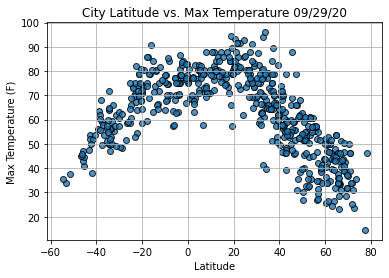

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

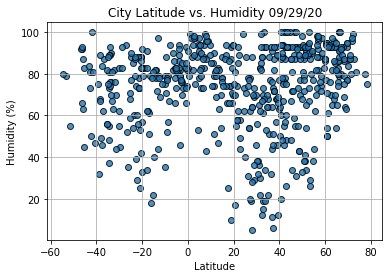

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

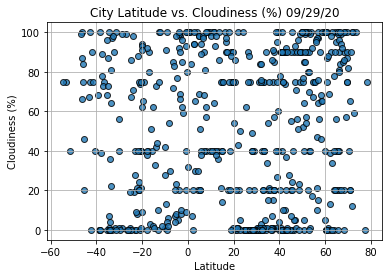

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

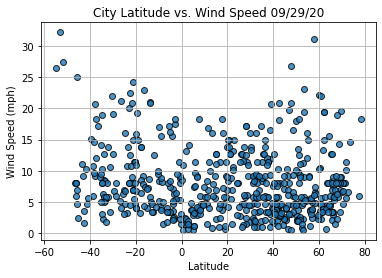

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City              Haines Junction
Country                        CA
Date          2020-09-29 22:53:35
Lat                         60.75
Lng                       -137.51
Max Temp                    46.98
Humidity                       54
Cloudiness                     87
Wind Speed                   2.24
Name: 13, dtype: object

In [29]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
553     True
554     True
555     True
556     True
557     True
Name: Lat, Length: 558, dtype: bool

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Magadan,RU,2020-09-29 23:00:57,59.57,150.80,43.84,83,100,2.55
4,Kapaa,US,2020-09-29 22:53:14,22.08,-159.32,86.00,62,1,6.93
5,Kloulklubed,PW,2020-09-29 23:00:58,7.04,134.26,78.80,88,90,3.36
8,Albany,US,2020-09-29 22:53:12,42.60,-73.97,63.00,78,74,3.47
10,Egvekinot,RU,2020-09-29 23:00:42,66.32,-179.17,33.64,91,84,2.91
...,...,...,...,...,...,...,...,...,...
553,Makakilo City,US,2020-09-29 22:50:51,21.35,-158.09,91.40,58,1,12.75
554,Mankono,CI,2020-09-29 23:02:19,8.06,-6.19,69.22,98,100,3.69
555,Pedara,IT,2020-09-29 23:02:19,37.62,15.06,70.00,93,20,3.36
556,Yuanping,CN,2020-09-29 23:02:20,38.72,112.76,50.79,89,27,1.05


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [32]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

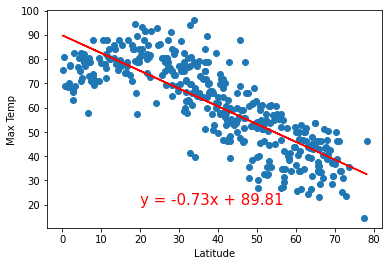

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(20,20))

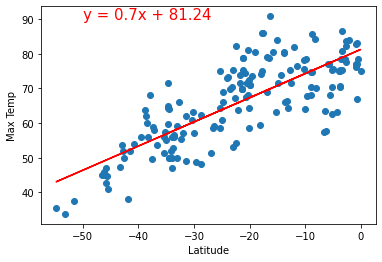

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

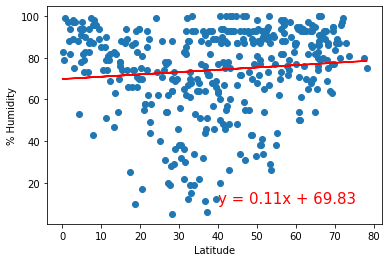

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

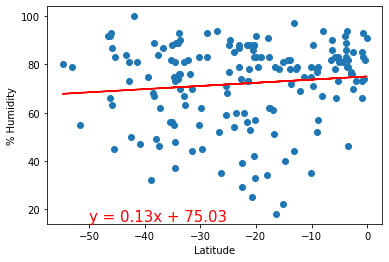

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

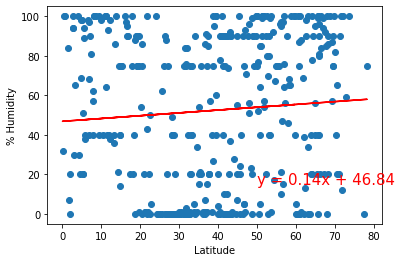

In [37]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', '% Humidity',(50,15))

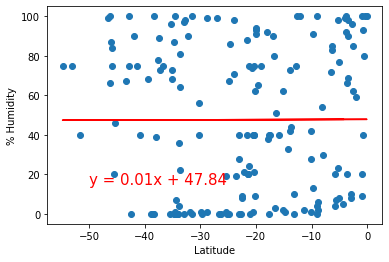

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness', '% Humidity',(-50,15))

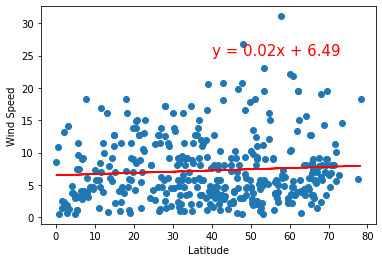

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,25))


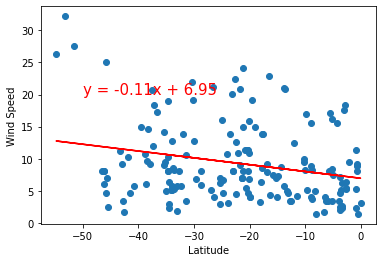

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed", 'Wind Speed',(-50,20))